In [1]:
import mocksipipeline.instrument.configuration
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import xarray

In [2]:
moxsi = mocksipipeline.instrument.configuration.moxsi_cdr

Calculate the PSF for the relevant apertures and the optical design we care about

In [3]:
wavelengths = [10, 25, 50, 75] * u.angstrom

Test the circular aperture case

In [4]:
psf_stack_pinhole = mocksipipeline.instrument.configuration.moxsi_slot_spectrogram_pinhole.channel_list[0].aperture.calculate_psf(
    wavelengths,
    mocksipipeline.instrument.configuration.moxsi_slot_spectrogram_pinhole.optical_design,
    #fft_oversample=4,
    mask_resolution=1/8*u.micron,
    psf_resolution=1*u.micron,
)

In [5]:
psf_stack_pinhole

<xarray.DataArray (wavelength: 4, y: 392, x: 392)>
array([[[5.97104937e-06, 1.27613988e-05, 1.44361649e-05, ...,
         1.06473588e-05, 3.71265094e-06, 0.00000000e+00],
        [1.27613988e-05, 1.66073459e-05, 1.29707699e-05, ...,
         1.33222630e-05, 1.06731181e-05, 0.00000000e+00],
        [1.44361649e-05, 1.29707699e-05, 6.78689310e-06, ...,
         1.00403193e-05, 1.40774583e-05, 0.00000000e+00],
        ...,
        [1.06473588e-05, 1.33222630e-05, 1.00403193e-05, ...,
         1.67214779e-05, 1.31076872e-05, 0.00000000e+00],
        [3.71265094e-06, 1.06731181e-05, 1.40774583e-05, ...,
         1.31076872e-05, 6.33609009e-06, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.03248892e-05, 1.12353645e-05, 1.15888689e-05, ...,
         1.25117162e-05, 1.25265375e-05, 1.10755601e-05],
        [1.12353645e-05, 1.14211339e-05, 1.09568233e-05, ...,
         1.18709373e-05, 1.27197626e-05, 1.19691422e-05],
        [1.15888689e-05, 1.09568233e-05, 9.65945863e-06, ...,
         1.05070189e-05, 1.21660448e-05, 1.22810686e-05],
...
        [1.22526722e-05, 8.74652293e-06, 8.14507792e-06, ...,
         7.58286477e-06, 8.09425934e-06, 9.13102719e-06],
        [1.50963310e-05, 1.10707495e-05, 9.45635033e-06, ...,
         8.09425934e-06, 9.58835969e-06, 1.15172013e-05],
        [1.81833427e-05, 1.37781545e-05, 1.12423628e-05, ...,
         9.13102719e-06, 1.15172013e-05, 1.42391061e-05]],

       [[2.21760103e-05, 2.05810048e-05, 1.89859994e-05, ...,
         1.62025522e-05, 1.79540787e-05, 1.97056053e-05],
        [2.05810048e-05, 2.03103226e-05, 2.00396404e-05, ...,
         1.95109924e-05, 1.99179822e-05, 2.03249720e-05],
        [1.89859994e-05, 2.00396404e-05, 2.10932814e-05, ...,
         2.28194327e-05, 2.18818857e-05, 2.09443387e-05],
        ...,
        [1.62025522e-05, 1.95109924e-05, 2.28194327e-05, ...,
         2.82143571e-05, 2.48797964e-05, 2.15452357e-05],
        [1.79540787e-05, 1.99179822e-05, 2.18818857e-05, ...,
         2.48797964e-05, 2.28719112e-05, 2.08640260e-05],
        [1.97056053e-05, 2.03249720e-05, 2.09443387e-05, ...,
         2.15452357e-05, 2.08640260e-05, 2.01828162e-05]]])
Coordinates:
  * x              (x) float64 -194.8 -193.8 -192.8 -191.8 ... 194.2 195.2 196.2
  * y              (y) float64 -194.8 -193.8 -192.8 -191.8 ... 194.2 195.2 196.2
    delta_pixel_x  (x) float64 -27.83 -27.68 -27.54 -27.4 ... 27.74 27.89 28.03
    delta_pixel_y  (y) float64 -27.83 -27.68 -27.54 -27.4 ... 27.74 27.89 28.03
  * wavelength     (wavelength) float64 10.0 25.0 50.0 75.0

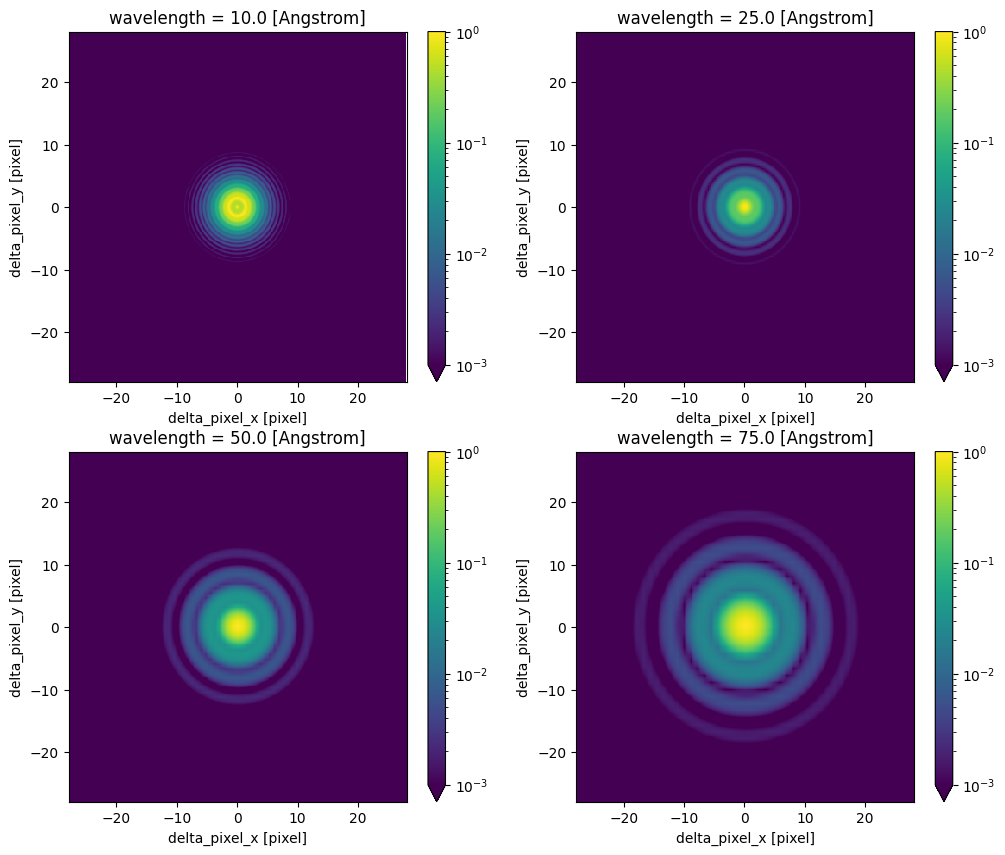

In [6]:
fig = plt.figure(figsize=(12,10))
for i,wv in enumerate(wavelengths):
    ax = fig.add_subplot(2,2,i+1)
    psf_stack_pinhole.sel(wavelength=wv.value).plot(ax=ax,norm=LogNorm(vmin=1e-3,vmax=1),
                                                    x='delta_pixel_x',
                                                    y='delta_pixel_y')
    #ax.set_xlim(-30, 30)
    #ax.set_ylim(-30,30)

In [9]:
psf_stack_slot = mocksipipeline.instrument.configuration.moxsi_slot_spectrogram_slot.channel_list[0].aperture.calculate_psf(
    wavelengths,
    mocksipipeline.instrument.configuration.moxsi_slot_spectrogram_slot.optical_design,
    mask_resolution=1/8*u.micron,
    psf_resolution=2*u.micron,
)

Interpolate this to a 1 micron grid (or we could do a 0.1 pixel grid)

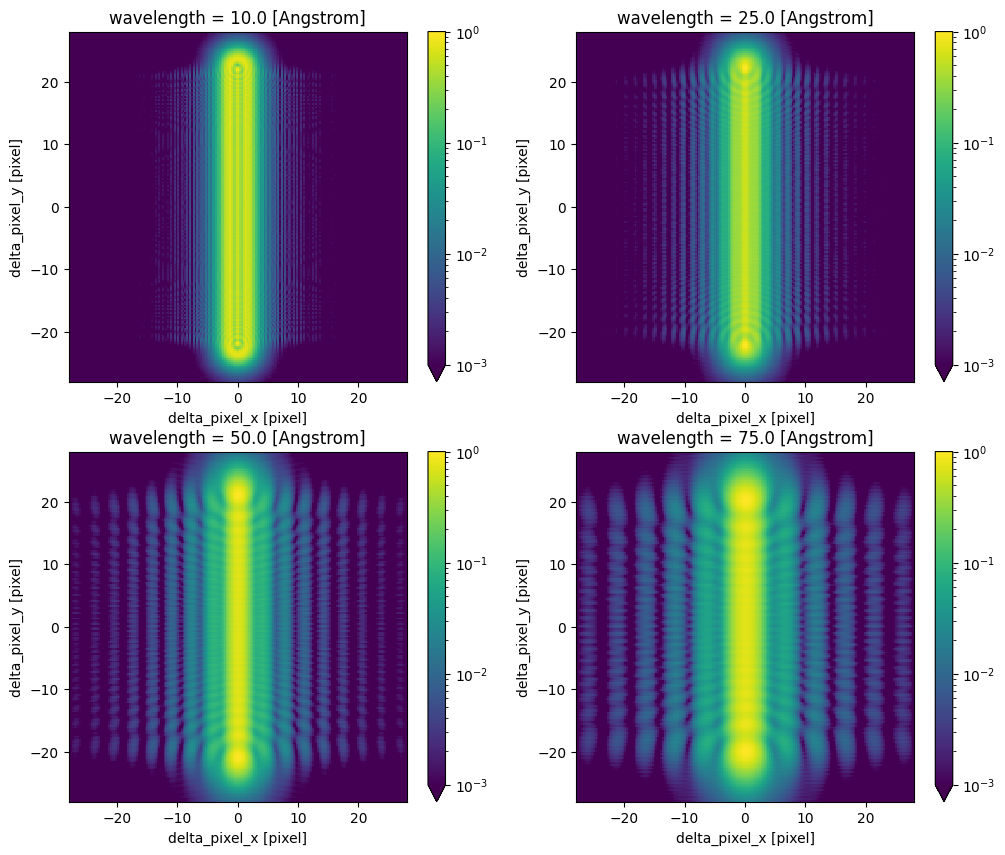

In [10]:
fig = plt.figure(figsize=(12,10))
for i,wv in enumerate(wavelengths):
    ax = fig.add_subplot(2,2,i+1)
    psf_stack_slot.sel(wavelength=wv.value).plot(ax=ax,norm=LogNorm(vmin=1e-3,vmax=1),
                                                 x='delta_pixel_x',
                                                 y='delta_pixel_y')
    #ax.set_xlim(-30, 30)
    #ax.set_ylim(-30,30)

In [12]:
np.diff(psf_stack_slot.delta_pixel_x)

array([0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571

Save the relevant cases

In [13]:
psf_cube = mocksipipeline.instrument.configuration.moxsi_cdr_spectrogram_pinhole.channel_list[0].aperture.calculate_psf(
    wavelengths,
    mocksipipeline.instrument.configuration.moxsi_cdr_spectrogram_pinhole.optical_design,
    save_psf=True,
    mask_resolution=1/8*u.micron,
    psf_resolution=1*u.micron,
)

In [14]:
psf_cube = mocksipipeline.instrument.configuration.moxsi_cdr_spectrogram_slot.channel_list[0].aperture.calculate_psf(
    wavelengths,
    mocksipipeline.instrument.configuration.moxsi_cdr_spectrogram_slot.optical_design,
    save_psf=True,
    mask_resolution=1/8*u.micron,
    psf_resolution=1*u.micron,
)

Now, let's try to speed up this calculation of the PSF by using xarray and Dask and vectorizing this operation a bit more.

In [3]:
import distributed

In [4]:
client = distributed.Client()

In [5]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 10,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52853,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:52868,Total threads: 2
Dashboard: http://127.0.0.1:52872/status,Memory: 12.80 GiB
Nanny: tcp://127.0.0.1:52856,


In [42]:
photon_wavelengths = np.random.rand(1000000)*70*u.AA + 1*u.AA
photon_wavelengths = np.sort(photon_wavelengths)

In [43]:
def random_choice(x):
    idx = np.random.choice(x.size, p=x.flatten())
    #idx = np.unravel_index(idx, original_shape)
    return idx

What I actually want to do:

- Load PSF as DataArray backed by Dask array with shape $(n_w,n_y,n_x)$
- Reshape DataArray such that resulting shape is $(n_w,n_yn_x)$
- Normalize such that each slice in wavelength is normalized to 1
- For all photon wavelengths $\lambda$ of which there are $n_p$, select the closest slice such that the resulting
- Apply random choice along the $n_p$ axis
- Using those indices, select out the appropriate $(\delta_x,\delta_y)$ entries

In [44]:
import dask

In [45]:
psf_photons = moxsi['spectrogram_slot_-11'].psf.stack(xy=['x','y'])
psf_photons = psf_photons / psf_photons.sum(dim=['xy'])
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    psf_photons = psf_photons.sel(wavelength=photon_wavelengths, method='nearest')

In [46]:
psf_photons

<xarray.DataArray (wavelength: 1000000, xy: 174724)>
dask.array<getitem, shape=(1000000, 174724), dtype=float64, chunksize=(97, 174724), chunktype=numpy.ndarray>
Coordinates:
    delta_pixel_x  (xy) float64 dask.array<chunksize=(174724,), meta=np.ndarray>
    delta_pixel_y  (xy) float64 dask.array<chunksize=(174724,), meta=np.ndarray>
  * wavelength     (wavelength) float64 10.0 10.0 10.0 10.0 ... 75.0 75.0 75.0
  * xy             (xy) object MultiIndex
  * x              (xy) float64 -207.9 -207.9 -207.9 ... 209.1 209.1 209.1
  * y              (xy) float64 -207.9 -206.9 -205.9 ... 207.1 208.1 209.1

In [47]:
i_jitter = np.apply_along_axis(random_choice, 1, psf_photons.data)

In [48]:
i_jitter

dask.array<random_choice-along-axis, shape=(1000000,), dtype=int64, chunksize=(97,), chunktype=numpy.ndarray>

In [49]:
jitter_res = i_jitter.compute()

In [56]:
jitter_x = psf_photons.delta_pixel_x.data[jitter_res].compute()
jitter_y = psf_photons.delta_pixel_y.data[jitter_res].compute()

In [57]:
jitter_y

array([ -7.8486604 ,  -9.56294611, -21.70580325, ...,   0.57991103,
       -12.8486604 ,  -2.99151754])

In [133]:
i_jitter = apply_ufunc(
    random_choice,
    psf_photons.compute(),
    input_core_dims=[['wavelength']],
    output_core_dims=[['wavelength']],
    exclude_dims=set((['wavelength'])),
            #output_dtypes=[int],
            #dask_gufunc_kwargs={'allow_rechunk':True},
            #dask='parallelized',
            #vectorize=True
)

(418, 418, 10)
<class 'numpy.ndarray'>


ValueError: probabilities do not sum to 1

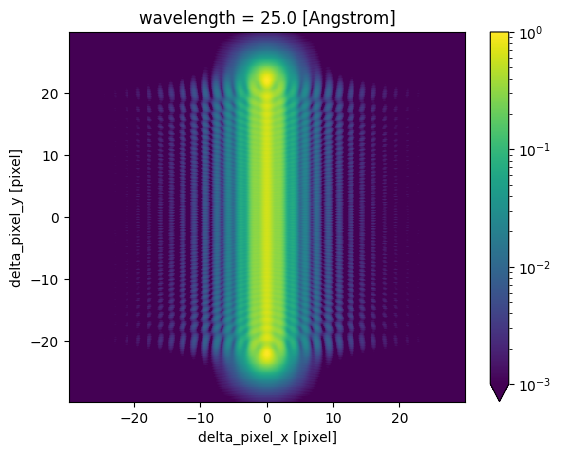

In [19]:
moxsi['spectrogram_slot_-11'].psf[1].plot(norm=LogNorm(vmin=1e-3,vmax=1),
                                                 x='delta_pixel_x',
                                                 y='delta_pixel_y')